<a href="https://colab.research.google.com/github/o-bollverk/msf/blob/main/msf_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlopen
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image
from google.colab import drive
from os import listdir
import numpy as np 
import cv2
from matplotlib import image
from matplotlib import pyplot


Klassid:

Airbus A320neo

Boeing 747-8 Intercontinental

Aviat Pitts Special S2S

Cub Crafter X Cub

Daher TBM 930

Diamond DA40NG

Diamond DA62

EXTRA 330LT



https://www.windowscentral.com/list-microsoft-flight-simulator-planes


Cloning the repository

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/o-bollverk/msf cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 6886 (delta 10), reused 8 (delta 5), pack-reused 6868
Receiving objects: 100% (6886/6886), 987.88 MiB | 38.67 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Checking out files: 100% (6830/6830), done.
/content/cloned-repo
colab  msf_data  msf_project1.ipynb  web_data


In [ ]:
! git pull

Already up to date.


### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

## Download images
Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

In [ ]:
ls web_data/

airbus_google  boeing_google    daher_google        diamondda62_google
aviat_google   cubcraft_google  diamond40ng_google  extra_google


In [ ]:
for new_name in ["airbus", "aviat", "boeing", "cubcraft", "daher", "diamond40ng", "diamondda62", "extra"]:
  folder = new_name
  file = new_name + '.csv'
  path = Path('data/cats')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  download_images('web_data/' + new_name + '_google', dest, max_pics=400)

## View data

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['airbus',
 'aviat',
 'boeing',
 'cubcraft',
 'daher',
 'diamond40ng',
 'diamondda62',
 'extra']

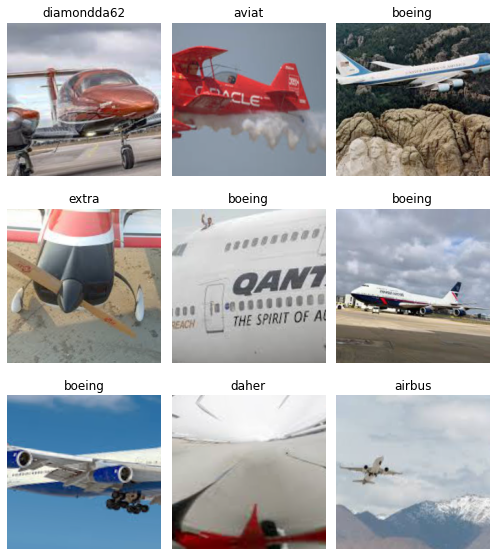

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['airbus',
  'aviat',
  'boeing',
  'cubcraft',
  'daher',
  'diamond40ng',
  'diamondda62',
  'extra'],
 8,
 2538,
 634)

Filter the image data

In [ ]:
# Eristada keskmise järgi
# Leida kõige suurema dispersiooni või standardhälbega pildid
# Või leida iga pildi enda sees
# standardhälve ja seal kus on see kahtlaselt sama, välja printida?
# load image as pixel array
#drive.mount('/content/drive')
airbuses = listdir("data/cats/airbus/")

airbuses = listdir("data/cats/airbus/")
sum_of_stds  = []
for i in range(100):
  result = np.sum(np.squeeze([np.std(x, axis =0) for x in image.imread("data/cats/airbus/" + airbuses[i])]), axis = 0)
  if len(result) == 3:
    sum_of_stds.append(result[0:3])
# Sum of standard deviations 

# vaatame kus standardhälvete summa on kõige suurem keskmisest?
sum_of_stds = np.squeeze(sum_of_stds)
sum_of_stds_mean = np.std(sum_of_stds, axis = 0)

differences = abs(sum_of_stds - sum_of_stds_mean)
differences2 = np.mean(differences, axis = 1)

# the rows with greatest differences
greatest_diff_indeces = np.arange(100)[np.argsort(differences2)]


#np.sort(differences, axis = 0)


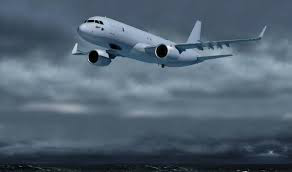

In [ ]:
# random_selection = np.random.randint(1, len(greatest_diff_indeces))
img = open_image("data/cats/airbus/" + airbuses[greatest_diff_indeces[1]])
img

## Train model

In [ ]:

learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,2.090692,1.238290,0.641956,14:25
1,1.554031,1.129694,0.657729,14:29


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

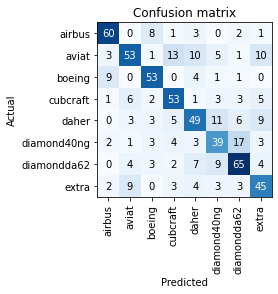

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
# Selecting one picture for visualization  (requires authorisation)
drive.mount('/content/drive')
path = "data/cats/airbus/00000001.jpg"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path

'data/cats/airbus/00000001.jpg'

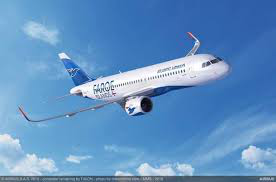

In [ ]:
img = open_image(path)
img


In [ ]:
import numpy as np
pred_class,pred_idx,outputs = learn.predict(img)
data.classes[int(pred_class)]

'airbus'

In [ ]:
from os import listdir
import warnings

selection_size = 400
clear_images = listdir("msf_data/image_data_clear/")
warnings.filterwarnings('ignore')

tulemused = []
random_selection = np.random.random_integers(0, len(clear_images) -1, size = selection_size)
for i in random_selection:
  path =  "msf_data/image_data_clear/" + str(clear_images[i])
  img = open_image(path)
  pred_class,pred_idx,outputs = learn.predict(img)
  vastus = data.classes[int(pred_class)]
  tulemused = np.append(tulemused, vastus)
correct_labels = np.array([x.split("_clear")[0] for x in clear_images])[random_selection]
accuracy = sum(tulemused == correct_labels)/len(correct_labels)
print("Clear weather accuracy: " + str(accuracy))


Clear weather accuracy: 0.3725


In [ ]:
pd.DataFrame({"correct": correct_labels, "prediction": tulemused}).sort_values("correct")


,correct,prediction
0,airbus,daher
149,airbus,cubcraft
315,airbus,airbus
141,airbus,boeing
135,airbus,daher
...,...,...
291,extra,cubcraft
292,extra,aviat
189,extra,extra
279,extra,diamondda62


In [ ]:
from os import listdir
import warnings

selection_size = 400
clear_images = listdir("msf_data/image_data_rainy/")
warnings.filterwarnings('ignore')

tulemused = []
random_selection = np.random.random_integers(0, len(clear_images) -1, size = selection_size)
for i in random_selection:
  path =  "msf_data/image_data_rainy/" + str(clear_images[i])
  img = open_image(path)
  pred_class,pred_idx,outputs = learn.predict(img)
  vastus = data.classes[int(pred_class)]
  tulemused = np.append(tulemused, vastus)
correct_labels = np.array([x.split("_rainy")[0] for x in clear_images])[random_selection]
accuracy = sum(tulemused == correct_labels)/len(correct_labels)
print("Rainy weather accuracy: " + str(accuracy))

pd.DataFrame({"correct": correct_labels, "prediction": tulemused}).sort_values("correct")


Rainy weather accuracy: 0.2575


,correct,prediction
135,airbus,cubcraft
360,airbus,boeing
113,airbus,cubcraft
110,airbus,airbus
105,airbus,airbus
...,...,...
245,extra,aviat
107,extra,aviat
251,extra,aviat
346,extra,aviat
